## Execute the project and pip the result into txt file

In [73]:
import sys
import os
os.system("dotnet run --project APITest > analysis.txt")

0

## Process the result

In [74]:
file = open('analysis.txt','r')
result = file.read().split('\n')
file.close()

## Depend on the result and plot the scatter diagram

In [180]:
x = []
y = []
for i in range(len(result)):
    raw = result[i] 
    raw = list(filter((lambda x :  x != "" ),raw.split('-')))
    if('bytes' in raw):
        bb = raw[0]
        continue
    if len(raw) == 0:
        continue
    x.append(bb)
    y.append(raw[0])

final = [[],[],[]]
axis = []
for i in range(len(y)):
    final[i%3].append(y[i])
    if i % 3 == 0:
        axis.append(x[i])
# print(final)
# print(axis)


## Plot the result

In [189]:
new_y,new_x,type(y[0])


(('0', '0', '0.001', '0.001', '0.003', '0.003', '0.011', '0.079'),
 ('20', '100', '10', '4048', '500', '2048', '1024', '5'),
 str)

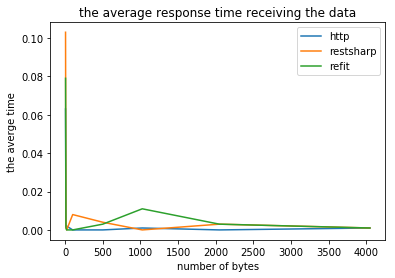

In [191]:
import matplotlib.pyplot as plt

for i in range(len(final)):
    y = list( map( lambda x : float(x),final[i]))
    x = list( map( lambda x : float(x),axis))
    #lists = sorted(zip(*[y,x]),key=lambda x: float(x[0]))
    #new_y,new_x= list(zip(*lists))
#     plt.scatter(new_x, new_y ,label=labels[i])
    plt.plot(x, y ,label=labels[i])

        
plt.xlabel('number of bytes')
plt.ylabel('the averge time')
plt.title('the average response time receiving the data')
labels = ['http','restsharp','refit']

plt.legend(loc='upper right')
plt.savefig('plot.png')
plt.show()